# Логистическая регрессия. Введение.

### Решим задачу многоклассовой классификации с помощью логистической регрессии на примере датасета Iris.

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [25]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

X.shape, y.shape

((150, 4), (150,))

Выведите на экран все различные значения целевой переменной

In [28]:
#your code here
set(y)

{0, 1, 2}

Разбейте данные на train и test (test - 20% от всех данных). Обучите логистическую регрессию на train и выведите качество (accuracy) на train и на test.

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, \
                                               random_state=1)

model = LogisticRegression()
model.fit(Xtrain, ytrain)

# model.predict(Xtest) # классы
# model.predict_proba(Xtest) # вероятности классов

pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

#your code here
accuracy_score(ytrain,pred_train), accuracy_score(ytest,pred_test)

C:\Users\elena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(0.9583333333333334, 0.8333333333333334)

Посмотрите на качество алгоритма на кросс-валидации.

In [30]:
from sklearn.model_selection import cross_val_score

#your code here
cross_val_score(model, X, y, cv=3, scoring='accuracy').mean()

C:\Users\elena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

0.9468954248366014

Посмотрим на значения метрик.

In [31]:
from sklearn.metrics import classification_report

print(classification_report(ytest,pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.62      0.76        13
           2       0.55      1.00      0.71         6

   micro avg       0.83      0.83      0.83        30
   macro avg       0.85      0.87      0.82        30
weighted avg       0.91      0.83      0.84        30



### Теперь решим задачу бинарной классификации.

Оставьте только объекты классов 0 и 1.

In [37]:
#your code here

Xnew = X[y!=0]
ynew = y[y!=0]

Xnew.shape, ynew.shape

((100, 4), (100,))

Разбейте данные на тренировочную и валидационную части. Обучите логистическую регрессию на них и посчитайте качество предсказания (accuracy_score).

In [38]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xnew, ynew, test_size=0.2, \
                                               random_state=1)

model = LogisticRegression()
model.fit(Xtrain, ytrain)

# model.predict(Xtest) # классы
# model.predict_proba(Xtest) # вероятности классов

pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

#your code here
accuracy_score(ytrain,pred_train), accuracy_score(ytest,pred_test)

C:\Users\elena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.975, 0.95)

### Функция для вычисления и визуализации матрицы ошибок (confusion matrix).

In [39]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Нарисуем матрицу ошибок для нашей задачи.

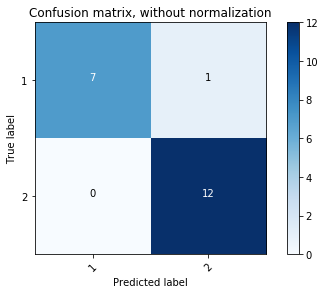

In [40]:
plot_confusion_matrix(confusion_matrix(ytest, pred_test), classes=['1','2'],
                        title='Confusion matrix, without normalization')

Дальнейшие задания ноутбука составлены по мотивам https://github.com/Yorko/mlcourse.ai/blob/master/jupyter_english/topic04_linear_models/topic4_linear_models_part4_good_bad_logit_movie_reviews_XOR.ipynb

# Логистическая регрессия. Пример.

Поработаем с данными IMDB movie reviews.

**Скачайте данные по ссылке https://www.dropbox.com/s/d9fadkx9vi3kw9o/aclImdb_v1.tar.gz?dl=0**

В этом датасете 25000 отзывов на фильмы: 12500 положительных и 12500 отрицательных. Мы хотим решить задачу классификации отзывов.

In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

Загрузим датасет.

In [42]:
from sklearn.datasets import load_files

PATH_TO_IMDB = './aclImdb'

reviews_train = load_files(os.path.join(PATH_TO_IMDB, "train"),
                           categories=['pos', 'neg'])
text_train, y_train = reviews_train.data, reviews_train.target

reviews_test = load_files(os.path.join(PATH_TO_IMDB, "test"),
                          categories=['pos', 'neg'])
text_test, y_test = reviews_test.data, reviews_test.target

In [43]:
print("Number of documents in training data: %d" % len(text_train))
print(np.bincount(y_train))
print("Number of documents in test data: %d" % len(text_test))
print(np.bincount(y_test))

Number of documents in training data: 25000
[12500 12500]
Number of documents in test data: 25000
[12500 12500]


Примеры отзывов

In [5]:
text_train[1]

b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decision" should without a doubt be you\'re choice over this one, even the "Turbulenc

In [6]:
y_train[1]

0

In [7]:
text_train[2]

b'Everyone plays their part pretty well in this "little nice movie". Belushi gets the chance to live part of his life differently, but ends up realizing that what he had was going to be just as good or maybe even better. The movie shows us that we ought to take advantage of the opportunities we have, not the ones we do not or cannot have. If U can get this movie on video for around $10, it\xc2\xb4d be an investment!'

In [8]:
y_train[2]

1

### Для генерации признаков используем CountVectorizer

![How it works](CV.png)

![How it works](CV2.png)

In [44]:
cv = CountVectorizer()
cv.fit(text_train)

len(cv.vocabulary_)

74849

Посмотрим на слова в получившимся словаре.

In [10]:
print(cv.get_feature_names()[:50])
print(cv.get_feature_names()[50000:50050])

['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02', '020410', '029', '03', '04', '041', '05', '050', '06', '06th', '07', '08', '087', '089', '08th', '09', '0f', '0ne', '0r', '0s', '10', '100', '1000', '1000000', '10000000000000', '1000lb', '1000s', '1001', '100b', '100k', '100m']
['pincher', 'pinchers', 'pinches', 'pinching', 'pinchot', 'pinciotti', 'pine', 'pineal', 'pineapple', 'pineapples', 'pines', 'pinet', 'pinetrees', 'pineyro', 'pinfall', 'pinfold', 'ping', 'pingo', 'pinhead', 'pinheads', 'pinho', 'pining', 'pinjar', 'pink', 'pinkerton', 'pinkett', 'pinkie', 'pinkins', 'pinkish', 'pinko', 'pinks', 'pinku', 'pinkus', 'pinky', 'pinnacle', 'pinnacles', 'pinned', 'pinning', 'pinnings', 'pinnochio', 'pinnocioesque', 'pino', 'pinocchio', 'pinochet', 'pinochets', 'pinoy', 'pinpoint', 'pinpoints', 'pins', 'pinsent']


Закодируем предложения индексами слов из словаря.

In [11]:
X_train = cv.transform(text_train)
X_train

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3445861 stored elements in Compressed Sparse Row format>

Посмотрим, что получилось

In [12]:
print(text_train[19723])

b'This movie was so bad that my i.q. went down about 40 points after seeing it. It made me wonder who could sit through the weeks it took to make it and think that it was worth it. It must of been some kind of personal favor to Van Damme.'


In [ ]:
# X_train[19723]

In [13]:
X_train[19723].nonzero()[1]

array([  690,  1277,  2121,  3258,  5502,  6543, 15056, 16389, 19854,
       23995, 34683, 36608, 40170, 40421, 41798, 44147, 44560, 44639,
       46680, 49390, 50590, 58596, 60478, 61380, 61617, 66322, 66339,
       66526, 66562, 66699, 67125, 67327, 70766, 72196, 72460, 72595,
       72904, 73492, 73702])

In [14]:
X_test = cv.transform(text_test)

## Обучим логистическую регрессию

In [15]:
logit = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=7)
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=7, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

Посмотрим на качество

In [16]:
logit.score(X_train, y_train), logit.score(X_test, y_test)

(0.9818, 0.86336)

**Нарисуем наибольшие по модулю веса**

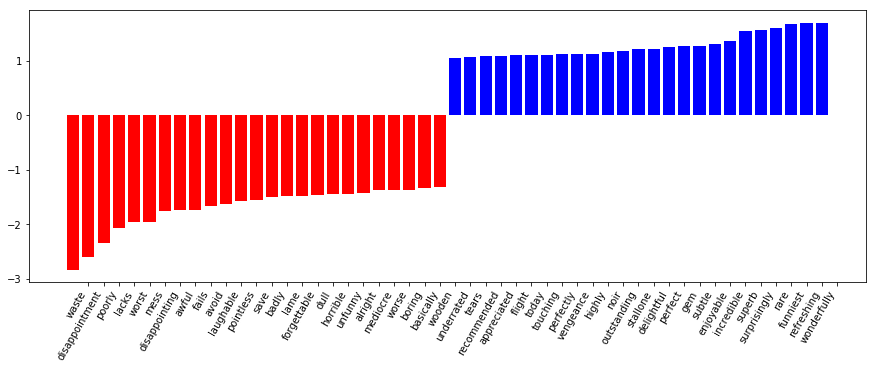

In [17]:
def visualize_coefficients(classifier, feature_names, n_features=25):

    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_features:]
    negative_coefficients = np.argsort(coef)[:n_features]
    all_coefs = np.hstack([negative_coefficients, positive_coefficients])

    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[all_coefs]]
    plt.bar(np.arange(2*n_features), coef[all_coefs], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1+2*n_features), feature_names[all_coefs], rotation=60, ha="right")
    
visualize_coefficients(logit, cv.get_feature_names())

Подберем параметр регуляризации в логистической регрессии.

In [18]:
from sklearn.pipeline import make_pipeline

pipe_logit = make_pipeline(CountVectorizer(),
                           LogisticRegression(solver='lbfgs', random_state=123))

pipe_logit.fit(text_train, y_train)
pipe_logit.score(text_test, y_test)

C:\Users\elena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.86396

In [19]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {'logisticregression__C': np.logspace(-5, 0, 6)}
grid_logit = GridSearchCV(pipe_logit, 
                          param_grid, 
                          return_train_score=True, 
                          n_jobs=1,
                          cv=3)

grid_logit.fit(text_train, y_train)

C:\Users\elena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

Wall time: 15h 34min 18s


C:\Users\elena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [20]:
grid_logit.best_params_, grid_logit.best_score_

({'logisticregression__C': 0.1}, 0.88484)

Результаты подбора параметра по кросс-валидации

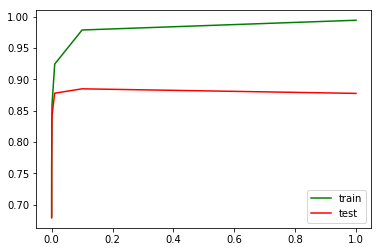

In [21]:
plt.plot(grid_logit.param_grid['logisticregression__C'], grid_logit.cv_results_['mean_train_score'],
        color='green', label='train')
plt.plot(grid_logit.param_grid['logisticregression__C'], grid_logit.cv_results_['mean_test_score'],
        color='red', label='test')
plt.legend()

In [22]:
grid_logit.score(text_test, y_test)

0.87812

### Нарисуем ROC-кривую и вычислим ROC-AUC на тестовых данных.

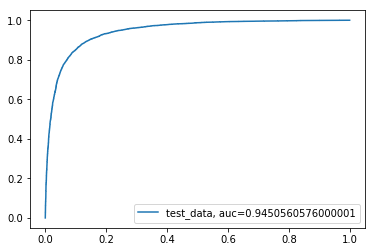

In [23]:
from sklearn import metrics

pred = grid_logit.predict_proba(text_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test, pred)

auc = metrics.roc_auc_score(y_test, pred)

plt.plot(fpr,tpr,label="test_data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Задание

Нарисуйте на одном графике ROC-кривые для train и для test. Добавьте на график значения ROC-AUC.

In [ ]:
#your code here

### Нарисуем матрицу ошибок.

In [ ]:
ans_test = grid_logit.predict(text_test)

plot_confusion_matrix(confusion_matrix(y_test, ans_test), classes=['0','1'],
                        title='Confusion matrix, without normalization')

#### Задание

Добавим в условие задачи, что мы хотим, чтобы как можно меньше положительных отзывов алгоритм предсказывал, как отрицательные. 
Для этого подберите порог вероятности таким образом, чтобы False Negative элементов на тесте было не больше 1000.

Нарисуйте полученную матрицу ошибок.

Выведите значение ROC-AUC.

Выведите значения precision, recall и f1-score (все они находятся в sklearn.metrics).

In [ ]:
#your code here

# Когда линейные модели работают плохо?

![How it works](XOR.png)

Создадим данные для задачи XOR

In [ ]:
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired);

Напишем функцию, которая рисует разделяющую границу, проведенную классификатором

In [ ]:
def plot_boundary(clf, X, y, plot_title):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
    clf.fit(X, y)
    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    image = plt.imshow(Z, interpolation='nearest',
                           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                           aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                               linetypes='--')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(plot_title, fontsize=12);

In [ ]:
plot_boundary(LogisticRegression(solver='lbfgs'), X, y,
              "Logistic Regression, XOR problem")

Мы видим, что задача решена плохо. Попробуем добавить в качестве признаков полиномиальные признаки степени 2.

Теперь у нас будут признаки не только $(1, x_1, x_2)$, но и $1, x_1, x_2, x_1^2, x_1x_2, x_2^2$

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

logit_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)), 
                       ('logit', LogisticRegression(solver='lbfgs' ))])

In [ ]:
plot_boundary(logit_pipe, X, y,
              "Logistic Regression + quadratic features. XOR problem")

**Таким образом, при добавлении новых нелинейных признаков с помощью линейного классификатора можно решить линейно неразделимую задачу.**

# Задача классификации: есть ли у человека болезнь сердца.

Вам необходимо предсказать, болен пациент или здоров (target) и добиться наиболее высокого качества предсказания (accuracy). Можно использовать любые методы работы с данными (ограничение: классификатор - логистическая регрессия).

Обучение необходимо провести на данных heart_train.csv, а итоговое качество модели проверяется на heart_test.csv.

В качестве результата домашнего задания вам необходимо прислать код вашей финальной модели и csv-файл с предсказаниями на данных heart_test.csv. Метрика качества - accuracy.


### Описание данных

age - age in years

sex - (1 = male; 0 = female)

cpchest - pain type

trestbpsresting - blood pressure (in mm Hg on admission to the hospital)

cholserum - cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

target - 1 or 0

In [ ]:
import pandas as pd

df = pd.read_csv("heart_train.csv")
df.head()

Начнём с "бездумного" машинного обучения. Разбейте выборку на тренировочную и валидационную части (20% данных на валидацию), обучите логистическую регрессию с дефолтными параметрами и выведите на экран метрики качества на train и на test.

Постройте ROC-кривую.

Визуализируйте матрицу ошибок.

In [ ]:
#your code here

Теперь серьёзно подойдем к задаче.

### Шаги, которые нужно сделать:

1) Разведочный анализ данных (построение графиков, нахождение корреляций)

2) Различные способы кодирования данных

3) Генерация новых признаков (полиномиальные признаки, другие функции от признаков).

4*) Очистка данных (возможно, в данных есть аномальные значения, которые будут видны при визуализации), с ними надо поработать, можно удалить

5) Подбор гиперпараметров логистической регрессии по кросс-валидации

6) Проверка модели на переобученность

7) Построение ROC-кривой и вычисление ROC-AUC на тренировочной и тестовой выборках. Вычисление accuracy, precision, recall, f1-score.

In [ ]:
#your code here